In [13]:
#importing required libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [14]:
#Data Cleaning
df = pd.read_csv("/content/drive/MyDrive/CVD_cleaned.csv")
df.isnull().sum()

,0
General_Health,0
Checkup,0
Exercise,0
Heart_Disease,0
Skin_Cancer,0
Other_Cancer,0
Depression,0
Diabetes,0
Arthritis,0
Sex,0


<h1>Data Pre-processing</h1>

In [15]:
print("Handling the ordinal data: ['Age_Category', 'BMI', 'Diabetes', 'General Health', 'Checkup'] ")
print("\nAge Category:")
lst=[]
for i in range(len(df["Age_Category"])):
    if df.loc[i,"Age_Category"] in lst:
        continue
    else:
        lst.append(df.loc[i,"Age_Category"])
print("Age categories found:\n", lst)

merge={'80+':6, '70-74':5,'75-79':5,'60-64':4,'65-69':4,'50-54':3,'55-59':3,'40-44':2,'45-49':2,'30-34':1,'35-39':1,'18-24':0,'25-29':0}
df['Age_Category']=df['Age_Category'].map(merge)
print("Categorized age as: [18-29]=0, [30-39]=1, [40-49]=2, [50-59]=3, [60-69]=4, [70-79]=5, [80+]=6")

print("\nBMI:")
for i in range(len(df["BMI"])):
  if df.loc[i,"BMI"] < 18.5: df.loc[i,"BMI"]= 0
  elif df.loc[i, "BMI"] >= 18.5 and df.loc[i,"BMI"] < 24.9: df.loc[i,"BMI"]= 1
  elif df.loc[i,"BMI"] >=25 and df.loc[i,"BMI"] < 29.9: df.loc[i,"BMI"] = 2
  elif df.loc[i,"BMI"] >=30 and df.loc[i,"BMI"] <34.9: df.loc[i,"BMI"]=3
  else : df.loc[i,"BMI"]=4
print("Categorized the BMI as: <18.5(Under-Weight)=0, 18.5-24.9(Normal)=1, 25-29.9(Over-Weight)=2, 30-34.9(Obese)=3, >35(Extremely Obese)=4")

print("\nDiabetes:")
merge0={"No":0, "No, pre-diabetes or borderline diabetes":0, "Yes, but female told only during pregnancy":0, "Yes":1}
df['Diabetes']=df['Diabetes'].map(merge0)
print("Categorized the Diabetes as: ['No', 'No, pre-diabetes or borderline diabetes', 'Yes, but female told only during pregnancy']=0, Yes=3")

print("\nGeneral Health")
merge1={"Poor":0, "Fair":1, "Good":2, "Very Good":3, "Excellent":4}
df["General_Health"]=df["General_Health"].map(merge1)
print("Categorized General Health as: Poor:0, Fair:1, Good:2, Very Good:3, Excellent:4")

print("\nCheckup")
lst1=[]
for i in range(len(df["Checkup"])):
    if df.loc[i,"Checkup"] in lst1: continue
    else: lst1.append(df.loc[i,"Checkup"])
print("Checkup categories found:\n",lst1)
merge2={"Never":0, "5 or more years ago":0, "Within the past 5 years":0, "Within the past 2 years":1, "Within the past year":1}
df["Checkup"]=df["Checkup"].map(merge2)
print("Categorized Checkup as: [Never', '5 or more years ago', 'Within the past 5 years']=0 ['Within the past 2 years', 'Within the past year']=1")

#Handling Binomial Data
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Smoking_History"]=le.fit_transform(df["Smoking_History"])
df["Exercise"]=le.fit_transform(df["Exercise"])
df["Depression"]=le.fit_transform(df["Depression"])
df["Heart_Disease"]=le.fit_transform(df["Heart_Disease"])
df["Skin_Cancer"]=le.fit_transform(df["Skin_Cancer"])
df["Other_Cancer"]=le.fit_transform(df["Other_Cancer"])
df["Arthritis"]=le.fit_transform(df["Arthritis"])

#Standardizing the Numerical Data
sc=StandardScaler()
col=['Alcohol_Consumption','Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Height_(cm)', 'Weight_(kg)']
for i in col:
    df[i]=sc.fit_transform(df[[i]])

print(col,"\nScaled down above columns using StandardScaler")

Handling the ordinal data: ['Age_Category', 'BMI', 'Diabetes', 'General Health', 'Checkup'] 

Age Category:
Age categories found:
 ['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49', '18-24', '30-34', '55-59', '35-39', '40-44', '25-29']
Categorized age as: [18-29]=0, [30-39]=1, [40-49]=2, [50-59]=3, [60-69]=4, [70-79]=5, [80+]=6

BMI:
Categorized the BMI as: <18.5(Under-Weight)=0, 18.5-24.9(Normal)=1, 25-29.9(Over-Weight)=2, 30-34.9(Obese)=3, >35(Extremely Obese)=4

Diabetes:
Categorized the Diabetes as: ['No', 'No, pre-diabetes or borderline diabetes', 'Yes, but female told only during pregnancy']=0, Yes=3

General Health
Categorized General Health as: Poor:0, Fair:1, Good:2, Very Good:3, Excellent:4

Checkup
Checkup categories found:
 ['Within the past 2 years', 'Within the past year', '5 or more years ago', 'Within the past 5 years', 'Never']
Categorized Checkup as: [Never', '5 or more years ago', 'Within the past 5 years']=0 ['Within the past 2 years', 'Within the past ye

<h1>1.	Split dataset with 8:2 ratio for train and test sets</h1>

In [16]:
X = df.drop(columns=['Heart_Disease'])
y = df['Heart_Disease']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h1>2.	Apply SVM, Random forest and Logistic regression for building model (use X_train, Y-train)<br>
3.	Test the models one by one on unseen data (X_test)<br>
4.	Display accuracy score, classification report and confusion matrix for each of models</h1>


In [17]:
# Initialize models
models = {
    'SVM' : LinearSVC(C=1.0,max_iter=10000,dual=True),
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=2000)
}
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(f"\n{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"\n{name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    results[name] = acc


SVM Accuracy: 0.9191

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.50      0.00      0.00      4997

    accuracy                           0.92     61771
   macro avg       0.71      0.50      0.48     61771
weighted avg       0.89      0.92      0.88     61771


SVM Confusion Matrix:
[[56773     1]
 [ 4996     1]]

RandomForest Accuracy: 0.9177

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     56774
           1       0.42      0.05      0.08      4997

    accuracy                           0.92     61771
   macro avg       0.67      0.52      0.52     61771
weighted avg       0.88      0.92      0.89     61771


RandomForest Confusion Matrix:
[[56455   319]
 [ 4766   231]]

LogisticRegression Accuracy: 0.9191

LogisticRegression Classification Report:
              precision    reca

<h1>5.	Plot the comparison of the accuracies as a bar chart</h1>

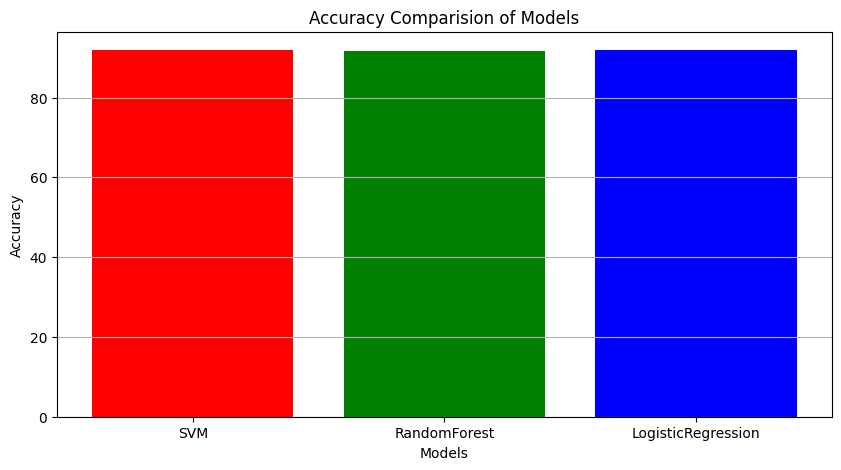

In [6]:
a=list(results.keys())
b=list(results.values())
for i in range(len(b)): b[i]*=100
plt.figure(figsize=(10,5))
plt.bar(a,b,color=['r','g','b'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparision of Models')
plt.grid(True, axis='y')
plt.show()

<h1>6.	Apply randomised grid search to tune the hyper parameters</h1>

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np


models = {
    'SVM': {
        'model': LinearSVC(max_iter=2000, dual=False, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'loss': ['squared_hinge'],
            'penalty': ['l2']
        },
        'n_iter': 8
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2],
            'class_weight': [None, 'balanced']
        },
        'n_iter': 8
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=500, random_state=42, n_jobs=-1),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'liblinear']
        },
        'n_iter': 8
    }
}

results = {}

for name, config in models.items():
    print(f"\n=== Training {name} ===")


    random_search = RandomizedSearchCV(
        estimator=config['model'],
        param_distributions=config['params'],
        n_iter=config['n_iter'],
        cv=3,  # Reduced CV folds
        scoring='accuracy',
        random_state=42,
        n_jobs=-1,
        verbose=1
    )


    random_search.fit(X_train, y_train)


    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)


    results[name] = {
        'accuracy': acc,
        'best_params': random_search.best_params_,
        'model': best_model
    }

    print(f"\nBest Parameters: {random_search.best_params_}")
    print(f"Validation Accuracy: {acc:.4f}")


print("\n=== Final Model Comparison ===")
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
for name, result in results.items():
    print(f"{name}: Accuracy = {result['accuracy']:.4f}" +
          (" (Best)" if name == best_model_name else ""))


print(f"\n=== Best Model Detailed Report ({best_model_name}) ===")
print("\nClassification Report:")
print(classification_report(y_test, results[best_model_name]['model'].predict(X_test)))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, results[best_model_name]['model'].predict(X_test)))


=== Training SVM ===
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=8. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best Parameters: {'penalty': 'l2', 'loss': 'squared_hinge', 'C': 0.1}
Validation Accuracy: 0.9191

=== Training RandomForest ===
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'class_weight': None}
Validation Accuracy: 0.9193

=== Training LogisticRegression ===
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=8. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(



Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
Validation Accuracy: 0.9192

=== Final Model Comparison ===
SVM: Accuracy = 0.9191
RandomForest: Accuracy = 0.9193 (Best)
LogisticRegression: Accuracy = 0.9192

=== Best Model Detailed Report (RandomForest) ===

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.59      0.01      0.02      4997

    accuracy                           0.92     61771
   macro avg       0.75      0.50      0.49     61771
weighted avg       0.89      0.92      0.88     61771


Confusion Matrix:
[[56745    29]
 [ 4956    41]]


<h1>7.	Predict and display the health status for a single input from the dataset resembling the working of an AI system</h1>

In [27]:
import random
import pandas as pd

random_index = random.choice(X_test.index)
random_sample = X_test.loc[[random_index]]

actual_label = "Has Heart Disease" if y_test.loc[random_index] == 1 else "No Heart Disease"

prediction = models["RandomForest"].predict(random_sample)[0]
prediction_label = "High Risk of Heart Disease" if prediction == 1 else "Low Risk"
print(random_sample,"\nResult:",prediction_label)

       General_Health  Checkup  ...  Green_Vegetables_Consumption  FriedPotato_Consumption
46530               2        1  ...                     -0.476373                 -0.73362

[1 rows x 18 columns] 
Result: Low Risk
